Подключение Google Диска...
Mounted at /content/drive
Распаковка ZIP архива /content/drive/MyDrive/Colab_Datasets/prepared_ui_elements.zip...
Данные успешно распакованы в: /content/prepared_ui_elements

--- Информация о системе ---
TensorFlow version: 2.18.0
Fri Jun 20 23:06:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Of

Model: "colab_cnn_img150_bs128_v2_nocache"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_model_v2 (Sequential)      │ (None, 7)              │    89,967,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,967,175 (343.20 MB)

 Trainable params: 89,965,447 (343.19 MB)

 Non-trainable params: 1,728 (6.75 KB)


--- Начало дообучения модели с эпохи 15 ---
Epoch 16/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.7173 - loss: 0.7751
Epoch 16: val_accuracy improved from -inf to 0.72772, saving model to /content/drive/MyDrive/Colab_Results/colab_finetune_img150_bs128_v3/best_model.keras
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 2678s 709ms/step - accuracy: 0.7173 - loss: 0.7751 - val_accuracy: 0.7277 - val_loss: 0.7662
Epoch 17/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.7188 - loss: 0.7723
Epoch 17: val_accuracy improved from 0.72772 to 0.72928, saving model to /content/drive/MyDrive/Colab_Results/colab_finetune_img150_bs128_v3/best_model.keras
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 2538s 702ms/step - accuracy: 0.7188 - loss: 0.7723 - val_accuracy: 0.7293 - val_loss: 0.7627
Epoch 18/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.7202 - loss: 0.7694
Epoch 18: val_accuracy improved from 0.72928 to 0.73022, saving model to /content/drive/MyDrive/Colab_Results/colab_finet

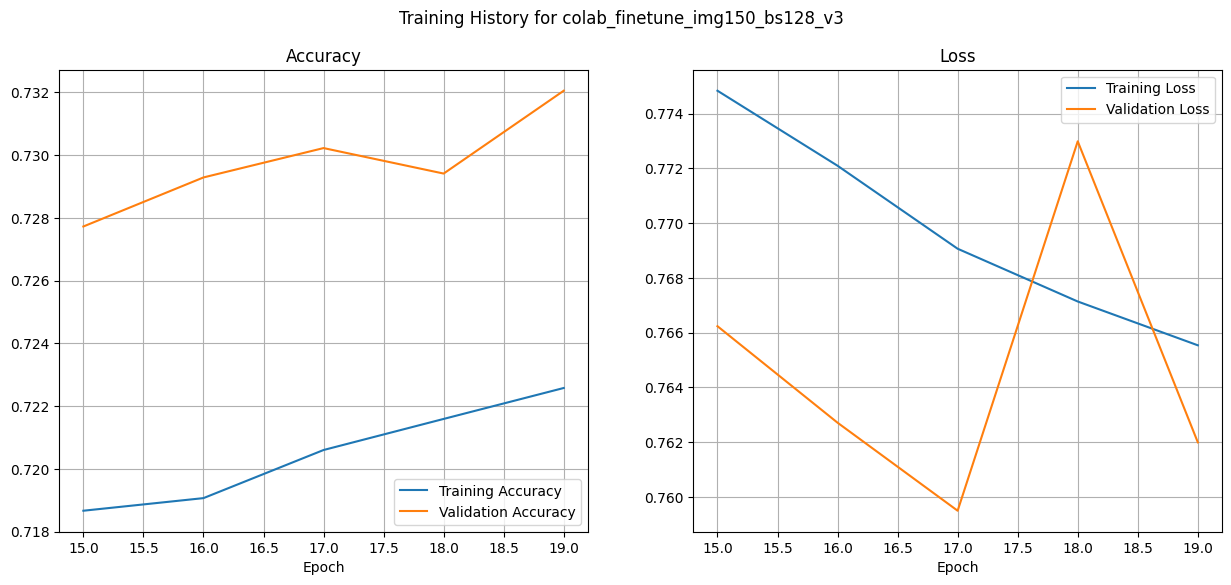


Оценка лучшей сохраненной модели...
Точность лучшей модели на валидационных данных: 0.7320
886/886 ━━━━━━━━━━━━━━━━━━━━ 139s 156ms/step


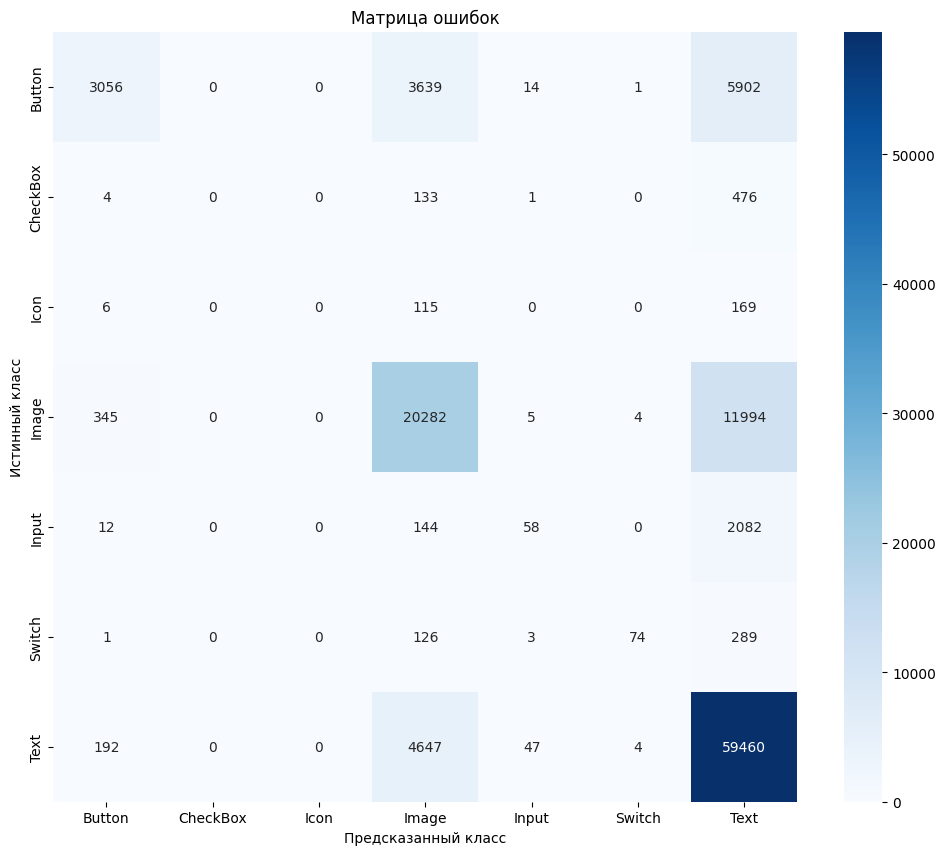


Отчет по классификации:
              precision    recall  f1-score        support
Button         0.845133  0.242309  0.376633   12612.000000
CheckBox       0.000000  0.000000  0.000000     614.000000
Icon           0.000000  0.000000  0.000000     290.000000
Image          0.697311  0.621575  0.657269   32630.000000
Input          0.453125  0.025261  0.047855    2296.000000
Switch         0.891566  0.150101  0.256944     493.000000
Text           0.739810  0.924009  0.821713   64350.000000
accuracy       0.732047  0.732047  0.732047       0.732047
macro avg      0.518135  0.280465  0.308631  113285.000000
weighted avg   0.728241  0.732047  0.700098  113285.000000

--- Визуализация предсказаний на случайных примерах ---


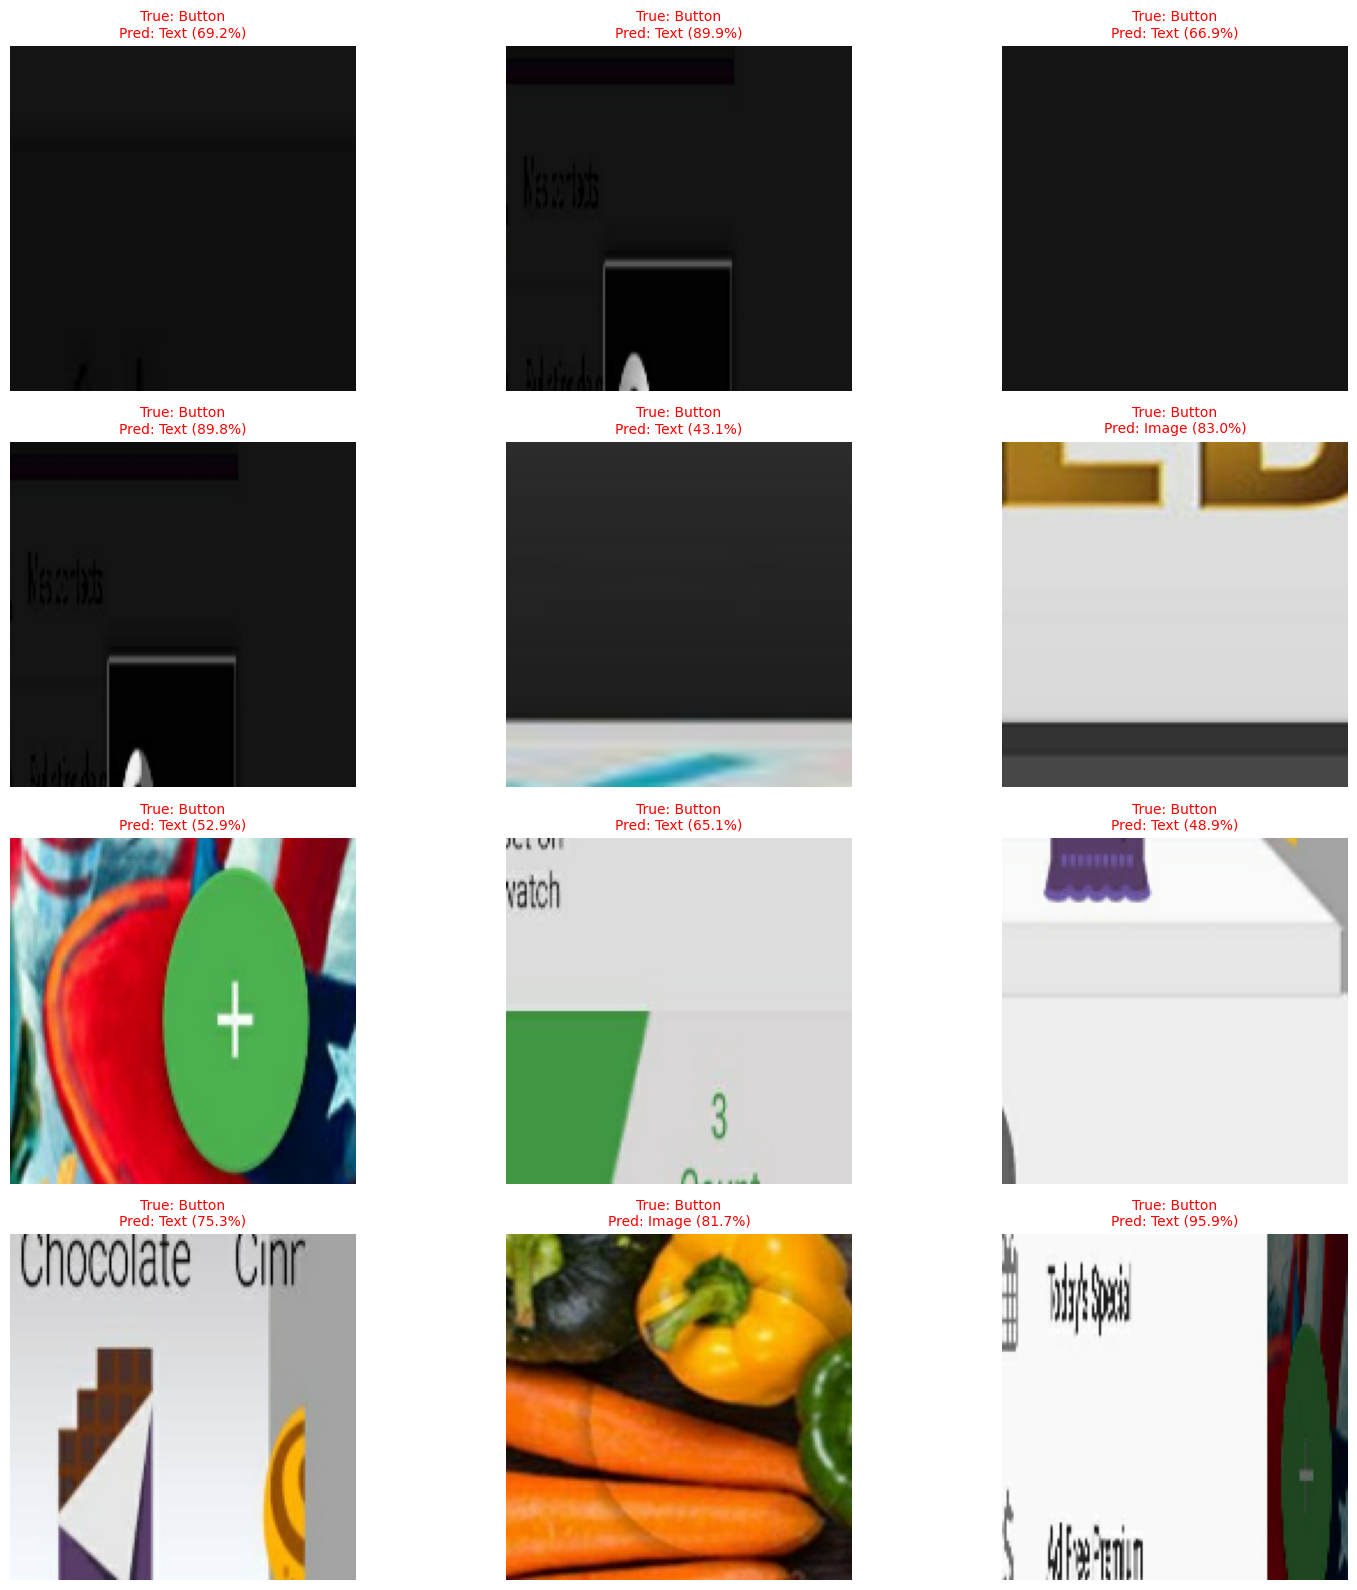


Анализ для эксперимента 'colab_finetune_img150_bs128_v3' завершен. Все артефакты сохранены на вашем Google Диске в папке: /content/drive/MyDrive/Colab_Results/colab_finetune_img150_bs128_v3


In [2]:
from google.colab import drive
import os
from zipfile import ZipFile
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
import time
import pandas as pd

# 1.1. Подключение Google Диска
print("Подключение Google Диска...")
drive.mount('/content/drive')

# 1.2. Распаковка данных с Диска в локальную среду Colab
archive_path_on_drive = '/content/drive/MyDrive/Colab_Datasets/prepared_ui_elements.zip'
local_data_path = '/content/prepared_ui_elements'

if not os.path.exists(archive_path_on_drive):
    raise FileNotFoundError(f"Архив не найден по пути: {archive_path_on_drive}. Проверьте путь и имя файла.")

if not os.path.exists(local_data_path):
    print(f"Распаковка ZIP архива {archive_path_on_drive}...")
    with ZipFile(archive_path_on_drive, 'r') as zip_ref:
        zip_ref.extractall(path='/content/')
    print(f"Данные успешно распакованы в: {local_data_path}")
else:
    print(f"Папка с данными {local_data_path} уже существует. Распаковка пропущена.")

# 1.3. Настройка и проверка GPU
print("\n--- Информация о системе ---")
print("TensorFlow version:", tf.__version__)
!nvidia-smi

from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
print('\nСмешанная точность (Mixed precision) включена.')


# --- ШАГ 2: КОНФИГУРАЦИЯ ЭКСПЕРИМЕНТА И ЗАГРУЗКА ДАННЫХ ---

PREPARED_DATA_DIR = Path(local_data_path)
IMG_SIZE = 150
BATCH_SIZE = 128
LEARNING_RATE = 0.0001
EPOCHS = 20
EXPERIMENT_NAME = f"colab_finetune_img{IMG_SIZE}_bs{BATCH_SIZE}_v3"

print(f"\nЗапускаем эксперимент по дообучению: {EXPERIMENT_NAME}")

train_dataset = tf.keras.utils.image_dataset_from_directory(
    PREPARED_DATA_DIR / 'train', label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE, shuffle=True, seed=42
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    PREPARED_DATA_DIR / 'validation', label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE, shuffle=False
)
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Найдено {num_classes} классов: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
print("Конвейер данных создан БЕЗ кэширования.")


# --- ШАГ 3: ЗАГРУЗКА СУЩЕСТВУЮЩЕЙ МОДЕЛИ ---
path_to_existing_model = '/content/drive/MyDrive/Colab/best_model.keras'

if not os.path.exists(path_to_existing_model):
    raise FileNotFoundError(f"Модель для дообучения не найдена по пути: {path_to_existing_model}. Проверьте путь.")

print(f"\n--- Загрузка существующей модели из {path_to_existing_model} для дообучения... ---")
full_model = tf.keras.models.load_model(path_to_existing_model)

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
optimizer = mixed_precision.LossScaleOptimizer(optimizer)
full_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("Модель успешно загружена и перекомпилирована для дообучения.")
print("\n--- Архитектура загруженной модели ---")
full_model.summary()


# --- ШАГ 4: ДООБУЧЕНИЕ МОДЕЛИ ---
results_dir_on_drive = Path(f'/content/drive/MyDrive/Colab_Results/{EXPERIMENT_NAME}')
results_dir_on_drive.mkdir(parents=True, exist_ok=True)
checkpoint_path = str(results_dir_on_drive / 'best_model.keras')

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)


initial_epoch_num = 15

print(f"\n--- Начало дообучения модели с эпохи {initial_epoch_num} ---")
start_time = time.time()
history = full_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    callbacks=[model_checkpoint, early_stopping],
    initial_epoch=initial_epoch_num
)
end_time = time.time()
print(f"\n--- Дообучение завершено за {(end_time - start_time) / 60:.2f} минут ---")


# --- ШАГ 5: АНАЛИЗ РЕЗУЛЬТАТОВ И СОХРАНЕНИЕ АРТЕФАКТОВ ---
print("\n--- Анализ результатов эксперимента ---")

def plot_history(history, experiment_name, save_dir, initial_epoch=0):
    if not history.history:
        print("Нет данных для построения графиков.")
        return
    acc, val_acc = history.history.get('accuracy', []), history.history.get('val_accuracy', [])
    loss, val_loss = history.history.get('loss', []), history.history.get('val_loss', [])
    # Корректируем диапазон эпох для графика
    epochs_range = range(initial_epoch, initial_epoch + len(acc))

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right'); plt.title('Accuracy'); plt.grid(True)
    plt.xlabel('Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right'); plt.title('Loss'); plt.grid(True)
    plt.xlabel('Epoch')
    plt.suptitle(f'Training History for {experiment_name}')
    plt.savefig(save_dir / "training_plots.png")
    plt.show()


plot_history(history, EXPERIMENT_NAME, results_dir_on_drive, initial_epoch=initial_epoch_num)

print("\nОценка лучшей сохраненной модели...")
try:
    best_model = tf.keras.models.load_model(checkpoint_path)

    loss, accuracy = best_model.evaluate(validation_dataset, verbose=0)
    print(f"Точность лучшей модели на валидационных данных: {accuracy:.4f}")

    y_pred_probs = best_model.predict(validation_dataset, verbose=1)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true_one_hot = np.concatenate([y.numpy() for x, y in validation_dataset], axis=0)
    y_true = np.argmax(y_true_one_hot, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Матрица ошибок'); plt.ylabel('Истинный класс'); plt.xlabel('Предсказанный класс')
    plt.savefig(results_dir_on_drive / "confusion_matrix.png")
    plt.show()

    print("\nОтчет по классификации:")
    report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(df_report)
    df_report.to_csv(results_dir_on_drive / "classification_report.csv")

    print("\n--- Визуализация предсказаний на случайных примерах ---")
    def visualize_predictions(model, dataset, num_images=12, save_dir=None):
        plt.figure(figsize=(16, 16))
        for images, labels in dataset.take(1):
            predictions = model.predict(images, verbose=0)
            for i in range(min(num_images, len(images))):
                ax = plt.subplot(4, 3, i + 1)
                plt.imshow(images[i].numpy().astype("uint8"))
                true_label, pred_label = class_names[np.argmax(labels[i])], class_names[np.argmax(predictions[i])]
                confidence = 100 * np.max(predictions[i])
                color = "green" if pred_label == true_label else "red"
                plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)", color=color, fontsize=10)
                plt.axis("off")
        plt.tight_layout()
        if save_dir:
            plt.savefig(save_dir / "predictions_visualization.png")
        plt.show()

    visualize_predictions(best_model, validation_dataset, save_dir=results_dir_on_drive)

except (FileNotFoundError, OSError) as e:
    print(f"\nНе удалось загрузить или оценить лучшую модель. Ошибка: {e}")

print(f"\nАнализ для эксперимента '{EXPERIMENT_NAME}' завершен. Все артефакты сохранены на вашем Google Диске в папке: {results_dir_on_drive}")